calculates average DIC/nitrate ratio difference (mod vs obs) accounted for by uncoupled carbon in obs 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
from __future__ import print_function


import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp
from numpy import *
from scipy import *
import cmocean
import glob
import seawater

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline


In [3]:
#tj 
infil = loadtxt('../DATASETS/grl2016_edit2.txt')
infil_cor = loadtxt('../DATASETS/grl2016_nu.txt')

P = infil[:,8]
T = infil[:,9]
S = infil[:,10]
dic = infil[:,13]
no3 = infil[:,17]

#TJ constants - redfield C:N
redrat = 106/16
#TJ convert from umol/kg to umol/L
dens = seawater.dens(S,T,P)
dic_conv=dic*dens/1000

In [6]:
DIC = nc.Dataset('./extracted_ncs/DIC_fy_2018.nc')

DIC_mod = DIC['model_output']['mod_point'][:]
is_ref = DIC['model_output']['mod_x'][:]
js_ref = DIC['model_output']['mod_y'][:]

NO3 = nc.Dataset('./extracted_ncs/NO3_fy_2018.nc')

NO3_mod = NO3['model_output']['mod_point'][:]
is_ref3 = NO3['model_output']['mod_x'][:]
js_ref3 = NO3['model_output']['mod_y'][:]

In [7]:
#tJ loc tags
loc_tag = np.zeros_like(dic)
loc_tag[:] = 4

for w in range(0,len(loc_tag)):
    x = is_ref[w]
    y = js_ref[w]
    #jdf is 1
    if  (x <200) & (y>220) & (y<500) :
        loc_tag[w] = 1
        #n strait
    if  (y >= 550):
        loc_tag[w] = 2
        #central strait
    if (x> 150) & (y>380) & (y<550):
        loc_tag[w] = 3
        #4 is haro/puget
    if ((x>150) & (y>320) & (y<370)):
        loc_tag[w] =4

In [8]:
DIC_mod[DIC_mod==0]=np.nan

#DIC
dic_jdf=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==1)]
dic_haro=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==4)]
dic_ns =dic_conv[~(np.isnan(DIC_mod))&(loc_tag==2)]
dic_cs=dic_conv[~(np.isnan(DIC_mod))&(loc_tag==3)]

dic_MODjdf=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
dic_MODharo=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
dic_MODns =DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
dic_MODcs=DIC_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]

dic_compbl = dic_conv[~(np.isnan(DIC_mod))]
DIC_mod_compbl = DIC_mod[~(np.isnan(DIC_mod))]


#no3
NO3jdf=no3[~(np.isnan(DIC_mod))&(loc_tag==1)]
NO3haro=no3[~(np.isnan(DIC_mod))&(loc_tag==4)]
NO3ns =no3[~(np.isnan(DIC_mod))&(loc_tag==2)]
NO3cs=no3[~(np.isnan(DIC_mod))&(loc_tag==3)]

NO3_modjdf=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==1)]
NO3_modharo=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==4)]
NO3_modns =NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==2)]
NO3_modcs=NO3_mod[~(np.isnan(DIC_mod))&(loc_tag==3)]

## output of linear regressions of C:N data, model and observations, regional and cumulative

In [9]:
#([35-(100/redrat),35],[2200,2300],
import scipy.stats

#### jdf 
Nj1 = 20
Nj2 = 35
Dj1 = 2180
Dj2 = Dj1+(Nj2-Nj1)*redrat

print('linreg - model data JDF')
x = NO3_modjdf
y = dic_MODjdf
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope))
print('intercept: '+ str(intercept))
print('r value: '+ str(r_value))

NRj1 = 0
DRj1 = intercept
NRj2 = 40
DRj2 = intercept + 40*slope

#### HARO


print('')
print('linreg - model data HARO')
x = NO3_modharo
y = dic_MODharo
slope2, intercept2, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope2))
print('intercept: '+ str(intercept2))
print('r value: '+ str(r_value))

NRh1 = 0
DRh1 = intercept2
NRh2 = 40
DRh2 = intercept2 + 40*slope2

Nh1 = 15
Nh2 = 30
Dh1 = 2080
Dh2 = Dh1+(Nh2-Nh1)*redrat

## CENTRAL

print('')
print('linreg - model data CS')
x = NO3_modcs
y = dic_MODcs
slope3, intercept3, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope3))
print('intercept: '+ str(intercept3))
print('r value: '+ str(r_value))

NRc1 = 0
DRc1 = intercept3
NRc2 = 40
DRc2 = intercept3 + 40*slope3

Nc1 = 10
Nc2 = 30
Dc1 = 2030
Dc2 = Dc1+(Nc2-Nc1)*redrat

## NORTHERN

print('')
print('linreg - model data NS')
x = NO3_modns
y = dic_MODns
slope4, intercept4, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope4))
print('intercept: '+ str(intercept4))
print('r value: '+ str(r_value))

NRn1 = 0
DRn1 = intercept4
NRn2 = 40
DRn2 = intercept4 + 40*slope4

Nn1 = 10
Nn2 = 30

Dn1 = 2010
Dn2 = Dn1+(Nn2-Nn1)*redrat


print('')
print('linreg - model data ALL')

x = NO3_mod[~isnan(DIC_mod)]
y = DIC_mod[~isnan(DIC_mod)]
slope5, intercept5, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope5))
print('intercept: '+ str(intercept5))
print('r value: '+ str(r_value))

NRA1 = 0
DRA1 = intercept5
NRA2 = 40
DRA2 = intercept5 + 40*slope5

linreg - model data JDF
slope: 6.90681136876
intercept: 2053.76351239
r value: 0.914764392665

linreg - model data HARO
slope: 11.1842974632
intercept: 1895.80091452
r value: 0.66481546407

linreg - model data CS
slope: 9.93660194733
intercept: 1873.67023027
r value: 0.84579382354

linreg - model data NS
slope: 7.15403226302
intercept: 1932.09261097
r value: 0.881077415776

linreg - model data ALL
slope: 9.29838082056
intercept: 1913.66674581
r value: 0.778713567303


In [10]:
#([35-(100/redrat),35],[2200,2300],
import scipy.stats

#### jdf 
Njo1 = 20
Njo2 = 35
Djo1 = 2090
Djo2 = Djo1+(Njo2-Njo1)*redrat

print('linreg - obs data JDF')
x = NO3jdf
y = dic_jdf
slopeo, intercepto, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope))
print('intercept: '+ str(intercept))
print('r value: '+ str(r_value))

NRjo1 = 0
DRjo1 = intercepto
NRjo2 = 40
DRjo2 = intercepto + 40*slopeo

#### HARO


print('')
print('linreg - obs data HARO')
x = NO3haro
y = dic_haro
slope2o, intercept2o, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope2))
print('intercept: '+ str(intercept2))
print('r value: '+ str(r_value))

NRho1 = 0
DRho1 = intercept2o
NRho2 = 40
DRho2 = intercept2o + 40*slope2o

Nho1 = 20
Nho2 = 35
Dho1 = 2050
Dho2 = Dho1+(Nho2-Nho1)*redrat

## CENTRAL

print('')
print('linreg - obs data CS')
x = NO3cs
y = dic_cs
slope3o, intercept3o, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope3))
print('intercept: '+ str(intercept3))
print('r value: '+ str(r_value))

NRco1 = 0
DRco1 = intercept3o
NRco2 = 40
DRco2 = intercept3o + 40*slope3o

Nco1 = 20
Nco2 = 35
Dco1 = 1950
Dco2 = Dco1+(Nco2-Nco1)*redrat

## NORTHERN

print('')
print('linreg - obs data NS')
x = NO3ns[~isnan(NO3ns)]
y = dic_ns[~isnan(NO3ns)]
slope4o, intercept4o, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope4))
print('intercept: '+ str(intercept4))
print('r value: '+ str(r_value))

NRno1 = 0
DRno1 = intercept4o
NRno2 = 40
DRno2 = intercept4o+ 40*slope4o

Nno1 = 20
Nno2 = 30

Dno1 = 2000
Dno2 = Dno1+(Nno2-Nno1)*redrat


print('')
print('linreg - obs data ALL')

x = no3[~isnan(DIC_mod)&~isnan(no3)]
y = dic[~isnan(DIC_mod)&~isnan(no3)]
slope5o, intercept5o, r_value, p_value, std_err = scipy.stats.linregress(x, y)
print('slope: '+ str(slope5))
print('intercept: '+ str(intercept5))
print('r value: '+ str(r_value))

NRAo1 = 0
DRAo1 = intercept5o
NRAo2 = 40
DRAo2 = intercept5o + 40*slope5o

linreg - obs data JDF
slope: 6.90681136876
intercept: 2053.76351239
r value: 0.937833281805

linreg - obs data HARO
slope: 11.1842974632
intercept: 1895.80091452
r value: 0.690172071853

linreg - obs data CS
slope: 9.93660194733
intercept: 1873.67023027
r value: 0.87803112776

linreg - obs data NS
slope: 7.15403226302
intercept: 1932.09261097
r value: 0.907815428117

linreg - obs data ALL
slope: 9.29838082056
intercept: 1913.66674581
r value: 0.850802237548


#  C:N plots, model and observations, regional and cumulative

####  (small thin lines are ideal redfield ratio, long thin lines are observed lin. reg)

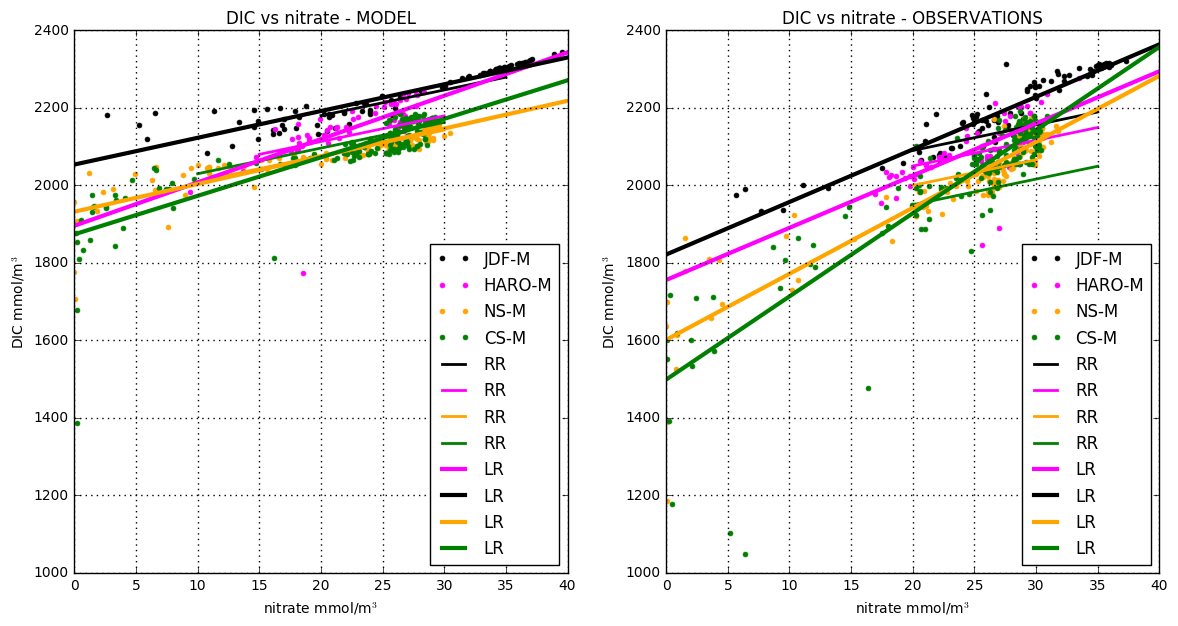

In [11]:
fig = plt.figure(figsize=(14,7))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)

    if i==1:
        
        #model DIC vs NO3
        ax.plot(NO3_modjdf,dic_MODjdf, c='black',marker='.',linestyle='None',markersize=7)
        ax.plot(NO3_modharo,dic_MODharo, c='fuchsia', marker='.',linestyle='None',markersize=7)
        ax.plot(NO3_modns,dic_MODns, c='orange', marker='.',linestyle='None',markersize=7)
        ax.plot(NO3_modcs,dic_MODcs, c='green', marker='.',linestyle='None',markersize=7)
        
        #redfieldian lines
        ax.plot([Nj1,Nj2],[Dj1,Dj2],c='black',linestyle='-',linewidth=2)
        ax.plot([Nh1,Nh2],[Dh1,Dh2],c='fuchsia',linestyle='-',linewidth=2)
        ax.plot([Nn1,Nn2],[Dn1,Dn2],c='orange',linestyle='-',linewidth=2)      
        ax.plot([Nc1,Nc2],[Dc1,Dc2],c='green',linestyle='-',linewidth=2)
        
        #linear regressions
        ax.plot([NRh1,NRh2],[DRh1,DRh2],c='fuchsia',linestyle='-',linewidth=3)
        ax.plot([NRj1,NRj2],[DRj1,DRj2],c='black',linestyle='-',linewidth=3)
        ax.plot([NRn1,NRn2],[DRn1,DRn2],c='orange',linestyle='-',linewidth=3)
        ax.plot([NRc1,NRc2],[DRc1,DRc2],c='green',linestyle='-',linewidth=3)
        
        #linear regression -whole domain
        #ax.plot([NRA1,NRA2],[DRA1,DRA2],c='mediumaquamarine',linestyle='-',linewidth=5)
        
        ax.legend(['JDF-M','HARO-M','NS-M','CS-M','RR','RR','RR','RR','LR','LR','LR','LR'],loc='best')
        ax.set_ylim([1000,2400])
        ax.set_xlim([0,40])
#         ax.plot([30-(100/redrat),30],[2100,2200],c='fuchsia',linestyle='-',linewidth=2)
#         ax.plot([25-(100/redrat),25],[1900,2000],c='orange',linestyle='-',linewidth=2)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_title('DIC vs nitrate - MODEL')
        ax.set_ylabel('DIC mmol/m$^3$')
        ax.set_xlabel('nitrate mmol/m$^3$')    
    
    if i==2:
        
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(NO3jdf,dic_jdf,'k.',markersize=7)
        ax.plot(NO3haro,dic_haro,'ko',c='fuchsia', marker='.',linestyle='None',markersize=7)
        ax.plot(NO3ns,dic_ns,c='orange', marker='.',linestyle='None',markersize=7)
        ax.plot(NO3cs,dic_cs,c='green', marker='.',linestyle='None',markersize=7)
        

        #redfieldian lines
        ax.plot([Njo1,Njo2],[Djo1,Djo2],c='black',linestyle='-',linewidth=2)
        ax.plot([Nho1,Nho2],[Dho1,Dho2],c='fuchsia',linestyle='-',linewidth=2)
        ax.plot([Nno1,Nno2],[Dno1,Dno2],c='orange',linestyle='-',linewidth=2)      
        ax.plot([Nco1,Nco2],[Dco1,Dco2],c='green',linestyle='-',linewidth=2)
        
        #linear regressions
        ax.plot([NRho1,NRho2],[DRho1,DRho2],c='fuchsia',linestyle='-',linewidth=3)
        ax.plot([NRjo1,NRjo2],[DRjo1,DRjo2],c='black',linestyle='-',linewidth=3)
        ax.plot([NRno1,NRno2],[DRno1,DRno2],c='orange',linestyle='-',linewidth=3)
        ax.plot([NRco1,NRco2],[DRco1,DRco2],c='green',linestyle='-',linewidth=3)
        
        #uptake lines
        #linear regression -whole domain
        #ax.plot([NRAo1,NRAo2],[DRAo1,DRAo2],c='mediumaquamarine',linestyle='-',linewidth=5)
        
        
        ax.legend(['JDF-M','HARO-M','NS-M','CS-M','RR','RR','RR','RR','LR','LR','LR','LR'],loc='best')
        ax.set_ylim([1000,2400])
        ax.set_xlim([0,40])

        
        ax.set_title('DIC vs nitrate - OBSERVATIONS')
        ax.set_ylabel('DIC mmol/m$^3$')
        ax.set_xlabel('nitrate mmol/m$^3$')#

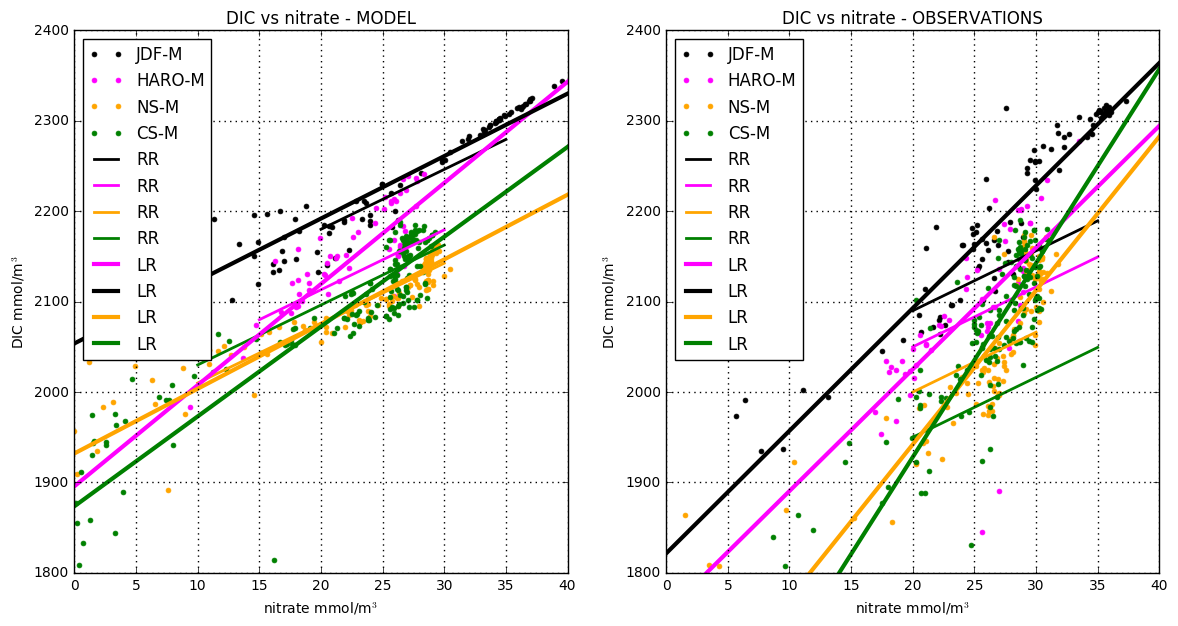

In [12]:
fig = plt.figure(figsize=(14,7))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)

    if i==1:
        
        #model DIC vs NO3
        ax.plot(NO3_modjdf,dic_MODjdf, c='black',marker='.',linestyle='None',markersize=7)
        ax.plot(NO3_modharo,dic_MODharo, c='fuchsia', marker='.',linestyle='None',markersize=7)
        ax.plot(NO3_modns,dic_MODns, c='orange', marker='.',linestyle='None',markersize=7)
        ax.plot(NO3_modcs,dic_MODcs, c='green', marker='.',linestyle='None',markersize=7)
        
        #redfieldian lines
        ax.plot([Nj1,Nj2],[Dj1,Dj2],c='black',linestyle='-',linewidth=2)
        ax.plot([Nh1,Nh2],[Dh1,Dh2],c='fuchsia',linestyle='-',linewidth=2)
        ax.plot([Nn1,Nn2],[Dn1,Dn2],c='orange',linestyle='-',linewidth=2)      
        ax.plot([Nc1,Nc2],[Dc1,Dc2],c='green',linestyle='-',linewidth=2)
        
        #linear regressions
        ax.plot([NRh1,NRh2],[DRh1,DRh2],c='fuchsia',linestyle='-',linewidth=3)
        ax.plot([NRj1,NRj2],[DRj1,DRj2],c='black',linestyle='-',linewidth=3)
        ax.plot([NRn1,NRn2],[DRn1,DRn2],c='orange',linestyle='-',linewidth=3)
        ax.plot([NRc1,NRc2],[DRc1,DRc2],c='green',linestyle='-',linewidth=3)
        
        #linear regression -whole domain
        #ax.plot([NRA1,NRA2],[DRA1,DRA2],c='mediumaquamarine',linestyle='-',linewidth=5)
        
        ax.legend(['JDF-M','HARO-M','NS-M','CS-M','RR','RR','RR','RR','LR','LR','LR','LR'],loc='best')
        ax.set_ylim([1800,2400])
        ax.set_xlim([0,40])

        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_title('DIC vs nitrate - MODEL')
        ax.set_ylabel('DIC mmol/m$^3$')
        ax.set_xlabel('nitrate mmol/m$^3$')    
    
    if i==2:
        
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.plot(NO3jdf,dic_jdf,'k.',markersize=7)
        ax.plot(NO3haro,dic_haro,'ko',c='fuchsia', marker='.',linestyle='None',markersize=7)
        ax.plot(NO3ns,dic_ns,c='orange', marker='.',linestyle='None',markersize=7)
        ax.plot(NO3cs,dic_cs,c='green', marker='.',linestyle='None',markersize=7)
        

        #redfieldian lines
        ax.plot([Njo1,Njo2],[Djo1,Djo2],c='black',linestyle='-',linewidth=2)
        ax.plot([Nho1,Nho2],[Dho1,Dho2],c='fuchsia',linestyle='-',linewidth=2)
        ax.plot([Nno1,Nno2],[Dno1,Dno2],c='orange',linestyle='-',linewidth=2)      
        ax.plot([Nco1,Nco2],[Dco1,Dco2],c='green',linestyle='-',linewidth=2)
        
        #linear regressions
        ax.plot([NRho1,NRho2],[DRho1,DRho2],c='fuchsia',linestyle='-',linewidth=3)
        ax.plot([NRjo1,NRjo2],[DRjo1,DRjo2],c='black',linestyle='-',linewidth=3)
        ax.plot([NRno1,NRno2],[DRno1,DRno2],c='orange',linestyle='-',linewidth=3)
        ax.plot([NRco1,NRco2],[DRco1,DRco2],c='green',linestyle='-',linewidth=3)
        
        #uptake lines
        #linear regression -whole domain
        #ax.plot([NRAo1,NRAo2],[DRAo1,DRAo2],c='mediumaquamarine',linestyle='-',linewidth=5)
        
        
        ax.legend(['JDF-M','HARO-M','NS-M','CS-M','RR','RR','RR','RR','LR','LR','LR','LR'],loc='best')
        ax.set_ylim([1800,2400])
        ax.set_xlim([0,40])

        
        ax.set_title('DIC vs nitrate - OBSERVATIONS')
        ax.set_ylabel('DIC mmol/m$^3$')
        ax.set_xlabel('nitrate mmol/m$^3$')

In [13]:
No1 = 20
No2 = 40
No0 = 0
Do1 = 1950
Do2 = Do1+(No2-No1)*redrat
Do0 = Do1 + (No0-No1)*redrat

N1 = 20
N2 = 40
N0 = 0
D1 = 2100
D2 = D1+(N2-N1)*redrat
D0 = D1 + (N0-N1)*redrat

#  C:N plots, model and observations, cumulative

####  (blue line is Redfield Ratio, teal line is observed drawdown)

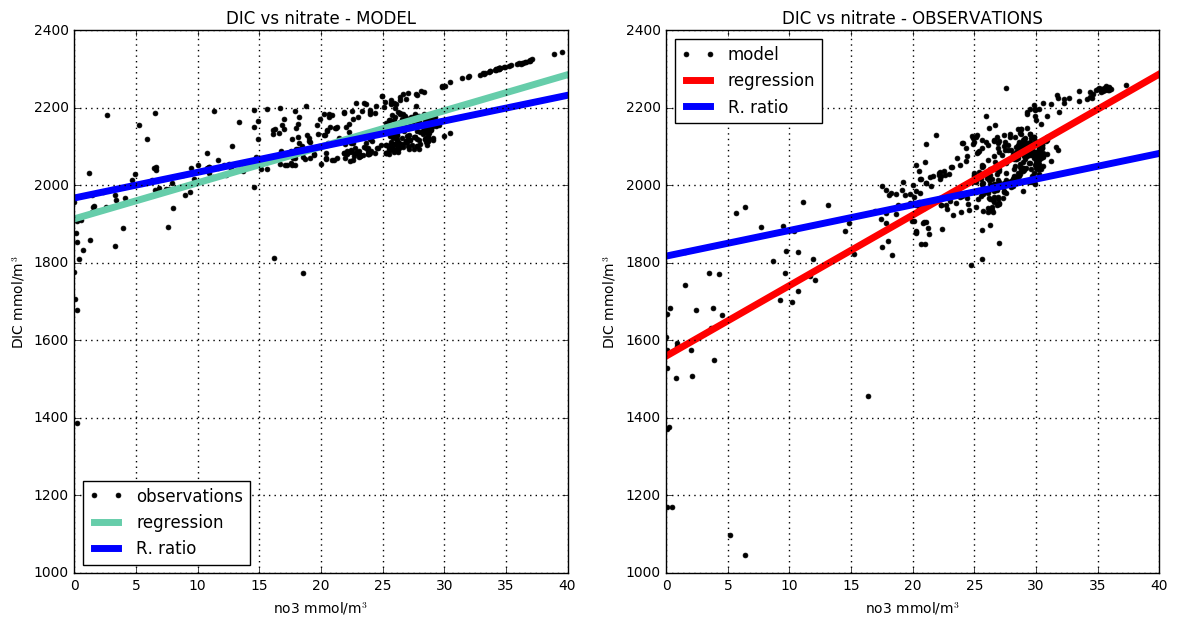

In [14]:
fig = plt.figure(figsize=(14,7))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)

    if i==1:

        x = NO3_mod[~isnan(DIC_mod)]
        y = DIC_mod[~isnan(DIC_mod)]
        ax.plot(x,y, c='black',marker='.',linestyle='None',markersize=7)

        #linear regression -whole domain
        ax.plot([NRA1,NRA2],[DRA1,DRA2],c='mediumaquamarine',linestyle='-',linewidth=5)
        ax.plot([N0,N2],[D0,D2],c='blue',linestyle='-',linewidth=5)
        
        ax.legend(['observations','regression','R. ratio'],loc='best')
        ax.set_ylim([1000,2400])
        ax.set_xlim([0,40])
#         ax.plot([30-(100/redrat),30],[2100,2200],c='fuchsia',linestyle='-',linewidth=2)
#         ax.plot([25-(100/redrat),25],[1900,2000],c='orange',linestyle='-',linewidth=2)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_title('DIC vs nitrate - MODEL')
        ax.set_ylabel('DIC mmol/m$^3$')
        ax.set_xlabel('no3 mmol/m$^3$')    
    
    if i==2:

        x = no3[~isnan(DIC_mod)&~isnan(no3)]
        y = dic[~isnan(DIC_mod)&~isnan(no3)]
        ax.plot(x,y, c='black',marker='.',linestyle='None',markersize=7)
        
        ax.grid(color='k', linestyle=':', linewidth=1)
        
        #uptake lines
        #linear regression -whole domain
        ax.plot([NRAo1,NRAo2],[DRAo1,DRAo2],c='red',linestyle='-',linewidth=5)
        ax.plot([No0,No2],[Do0,Do2],c='blue',linestyle='-',linewidth=5)
        ax.legend(['model','regression','R. ratio'],loc='best')        

        ax.set_ylim([1000,2400])
        ax.set_xlim([0,40])

        
        ax.set_title('DIC vs nitrate - OBSERVATIONS')
        ax.set_ylabel('DIC mmol/m$^3$')
        ax.set_xlabel('no3 mmol/m$^3$')

NameError: name 'd_s' is not defined

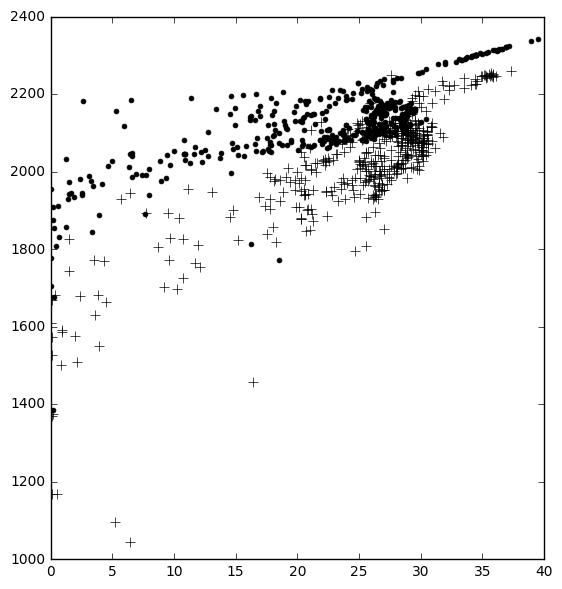

In [15]:
mod_DD = 9.298381    
obs_DD = 18.197463
Red_DD = 6.625

n_s = 0
n_e = 40

d_e = 1800 
d_eM = 1800 + (n_e-n_s)*mod_DD
d_eO = 1800 + (n_e-n_s)*obs_DD
d_eR = 1800 + (n_e-n_s)*Red_DD 


d_eMdiff = 1800 + (n_e-n_s)*(mod_DD-Red_DD)
d_eOdiff = 1800 + (n_e-n_s)*(obs_DD-Red_DD)
d_eRdiff = 1800 + (n_e-n_s)*(Red_DD-Red_DD) 

d_e2 = 2000
d_sMdiff = 2000 - (n_e-n_s)*(mod_DD-Red_DD)
d_sOdiff = 2000 - (n_e-n_s)*(obs_DD-Red_DD)
d_sRdiff = 2000 - (n_e-n_s)*(Red_DD-Red_DD) 

fig = plt.figure(figsize=(14,7))

for i in range(1,3):
    ax = fig.add_subplot(1,2,i)

    if i==1:

        x = NO3_mod[~isnan(DIC_mod)]
        y = DIC_mod[~isnan(DIC_mod)]
        ax.plot(x,y, c='black',marker='.',linestyle='None',markersize=7)
        
        x2 = no3[~isnan(DIC_mod)&~isnan(no3)]
        y2 = dic[~isnan(DIC_mod)&~isnan(no3)]
        ax.plot(x2,y2, c='black',marker='+',linestyle='None',markersize=7)

#         #linear regression -whole domain
        ax.plot([n_s,n_e],[d_s,d_eM],c='mediumaquamarine',linestyle='-',linewidth=5)
        ax.plot([n_s,n_e],[d_s,d_eO],c='red',linestyle='-',linewidth=5)
        ax.plot([n_s,n_e],[d_s,d_eR],c='blue',linestyle='-',linewidth=5)
#         ax.plot([N0,N2],[D0,D2],c='blue',linestyle='-',linewidth=5)
        
        ax.legend(['model','observations','model regression (incpt. 1800)','observations regression (incpt. 1800)','Redfield ratio (incpt. 1800)'],loc='best')
        ax.set_ylim([1000,2400])
        ax.set_xlim([0,40])

        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_title('DIC vs nitrate')
        ax.set_ylabel('DIC mmol/m$^3$')
        ax.set_xlabel('no3 mmol/m$^3$')    
    
    if i==2:



#         #linear regression -whole domain
#         ax.plot([n_s,n_e],[d_s,d_eMdiff],c='mediumaquamarine',linestyle='-',linewidth=5)
#         ax.plot([n_s,n_e],[d_s,d_eOdiff],c='red',linestyle='-',linewidth=5)
#         ax.plot([n_s,n_e],[d_s,d_eRdiff],c='blue',linestyle='-',linewidth=5)
        ax.plot([n_s,n_e],[d_sRdiff,d_e2],c='blue',linestyle='-',linewidth=5)        
        ax.plot([n_s,n_e],[d_sMdiff,d_e2],c='mediumaquamarine',linestyle='-',linewidth=5)
        ax.plot([n_s,n_e],[d_sOdiff,d_e2],c='red',linestyle='-',linewidth=5)

#         ax.plot([N0,N2],[D0,D2],c='blue',linestyle='-',linewidth=5)
        
        ax.legend(['Baseline (R. rat removed)','extra C uptake - model','extra C uptake - observations'],loc='best')
        ax.set_ylim([1000,2400])
        ax.set_xlim([0,40])

        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_title('Excess carbon uptake from linear regressions')
        ax.set_ylabel('DIC mmol/m$^3$')
        ax.set_xlabel('no3 mmol/m$^3$')  
   

In [ ]:
mod_DD = 9.298381    
obs_DD = 18.197463
Red_DD = 6.625

diff_mod = mod_DD-Red_DD
diff_obs = obs_DD-Red_DD


rat_mod_obs = diff_obs/diff_mod


## Pandas dataframe containing observed drawdown ratios

In [ ]:
import pandas as pd
# dataset = pd.DataFrame({'i':itt,'j':jtt,'temp (C)':temptt,\
#                         'sal':saltt,'schmidt':schtt,'wind (m/s)':windtt,\
#                        'pist.vel.(m/s)':pisttt,'o2 sol (mol/(L atm))':o2_sol,\
#                         'o2 flux (mmol/L) * (m/s)':o2_flx,'surface o2 (umol/L)':o2_conc})
# print(dataset)

print('Redfield C:N ratio is 6.625')
print('')
reg = ['JDF','HARO','CS','NS','ALL']
drawdown_rat_M = [slope,slope2,slope3,slope4,slope5]
drawdown_rat_O = [slopeo,slope2o,slope3o,slope4o,slope5o]

dataset = pd.DataFrame({'region':reg,'model DD rat.':drawdown_rat_M,'obs DD rat.':drawdown_rat_O})
print(dataset)

## Getting a chl_r factor from these regressions

PC = $chl_r (v_m p_0 \bar{\gamma} - PP)$

${v_m}$ is max. nut. uptake

$p_0$ is surface conc C or N

$\bar{\gamma}$ is light limitation 

PP is primary productivity

$chl_r$ in Ianson Allen 2002 is 0.2, coded into SMELT as well

($(v_m p_0 \bar{\gamma} - PP)$ will remain the same in any sensitivity study)

Model C:N is 9.298381 (+ 2.673 from RR

Observational C:N is 18.197463 (+11.572 from RR)

Ratio of excess C in obs to excess C in model: 4.328774312378222

If we increase chl_r by this ratio we get to a value of 0.8658. Is this reasonable?

In [ ]:
# fig = plt.figure(figsize=(7,7))

# for i in range(1,2):
#     ax = fig.add_subplot(1,1,i)
#     if i==1:
        
#         ax.plot(NO3_modjdf,dic_MODjdf, c='black',marker='.',linestyle='None',markersize=7)
#         ax.plot(NO3_modharo,dic_MODharo, c='fuchsia', marker='.',linestyle='None',markersize=7)
#         ax.plot(NO3_modns,dic_MODns, c='orange', marker='.',linestyle='None',markersize=7)
#         ax.plot(NO3_modcs,dic_MODcs, c='green', marker='.',linestyle='None',markersize=7)
        
        
#         ax.plot([Nj1,Nj2],[Dj1,Dj2],c='black',linestyle='-',linewidth=2)
#         ax.plot([NRj1,NRj2],[DRj1,DRj2],c='black',linestyle='-',linewidth=3)
        
#         ax.plot([Nh1,Nh2],[Dh1,Dh2],c='fuchsia',linestyle='-',linewidth=2)
#         ax.plot([NRh1,NRh2],[DRh1,DRh2],c='fuchsia',linestyle='-',linewidth=3)
        
#         ax.plot([Nn1,Nn2],[Dn1,Dn2],c='orange',linestyle='-',linewidth=2)
#         ax.plot([NRn1,NRn2],[DRn1,DRn2],c='orange',linestyle='-',linewidth=3)
        
#         ax.plot([Nc1,Nc2],[Dc1,Dc2],c='green',linestyle='-',linewidth=2)
#         ax.plot([NRc1,NRc2],[DRc1,DRc2],c='green',linestyle='-',linewidth=3)
        
#         ax.plot([NRA1,NRA2],[DRA1,DRA2],c='mediumaquamarine',linestyle='-',linewidth=5)
        
#         #ax.legend(['JDF-M','HARO-M','NS-M','CS-M','RR','LR','RR','LR','RR','LR','RR','LR'],loc='best')
#         ax.set_ylim([1800,2550])
#         ax.set_xlim([0,40])
#         ax.set_xticklabels([])
#         ax.set_yticklabels([])

#         ax.grid(color='k', linestyle=':', linewidth=2)




    